<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3 - KNN classification Lab

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/breast-cancer-wisconsin-data.csv', index_col = 'id')

#  EDA 

Explore dataset. Clean data. Find correlation. 

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [5]:
#Check why diagnosis is of type 'object'
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
#Drop 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis = 1)

<AxesSubplot:xlabel='radius_mean'>

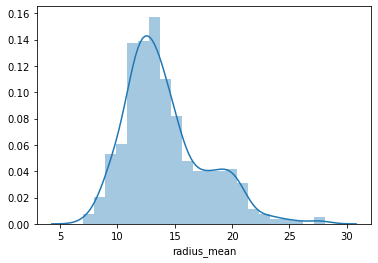

In [7]:
sns.distplot(df['radius_mean'])

# Set up the `diagnosis` variable as your target. How many classes are there?

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
#Create dataframe for variables (X), and target array (y)

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
#Create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

## What is the baseline accuracy?

In [11]:
#Create a dummy classifier (a noob model to use as a baseline)
from sklearn.dummy import DummyClassifier
Dummy_classifier = DummyClassifier(strategy='stratified', random_state=None, constant=None)

Dummy_classifier.fit(X_train,y_train)
Dummy_predictions = Dummy_classifier.predict(X_test)

from sklearn import metrics

#Test accuracy for dummy model
Dummy_accuracy = metrics.accuracy_score(y_test,Dummy_predictions)

print('Accuracy for dummy model (stratified):', Dummy_accuracy)

Accuracy for dummy model (stratified): 0.5614035087719298


# Choose features to be your predictor variables and set up your X.

In [12]:
#Already done

# Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier_n1 = KNeighborsClassifier(n_neighbors = 1)
KNNClassifier_n1.fit(X_train,y_train)
KNN_n1_predictions = KNNClassifier_n1.predict(X_test)


## Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [14]:
KNN_accuracy_1 = metrics.accuracy_score(y_test,KNN_n1_predictions)
print('Accuracy of KNN with n=1:',KNN_accuracy_1)
print('Accuracy for dummy model (stratified):', Dummy_accuracy)

Accuracy of KNN with n=1: 0.9298245614035088
Accuracy for dummy model (stratified): 0.5614035087719298


In [15]:
#Definitely at least better than the baseline

# Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [16]:
#Already done

# Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier_nrows = KNeighborsClassifier(n_neighbors = X_train.shape[0])
KNNClassifier_nrows.fit(X_train,y_train)
KNN_nrows_predictions = KNNClassifier_nrows.predict(X_test)

KNN_accuracy_nrows = metrics.accuracy_score(y_test,KNN_nrows_predictions)
print('Accuracy of KNN with n=1:',KNN_accuracy_1)
print('Accuracy of KNN with n= number of rows:',KNN_accuracy_nrows)
print('Accuracy for dummy model (stratified):', Dummy_accuracy)


Accuracy of KNN with n=1: 0.9298245614035088
Accuracy of KNN with n= number of rows: 0.6228070175438597
Accuracy for dummy model (stratified): 0.5614035087719298


In [18]:
#Seems like n= number of rows is worse than just n=1

# Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [19]:
# ANSWER
# plot test accuracy by number of neighbors:

#Initialize accuracy list

accuracy_scores = []

for i in range(1,X_train.shape[0]):
    KNNClassifier = KNeighborsClassifier(n_neighbors = i)
    KNNClassifier.fit(X_train,y_train)
    predictions = KNNClassifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test,predictions)
    accuracy_scores.append(accuracy)

#Check accuracy_scores list
len(accuracy_scores)

454

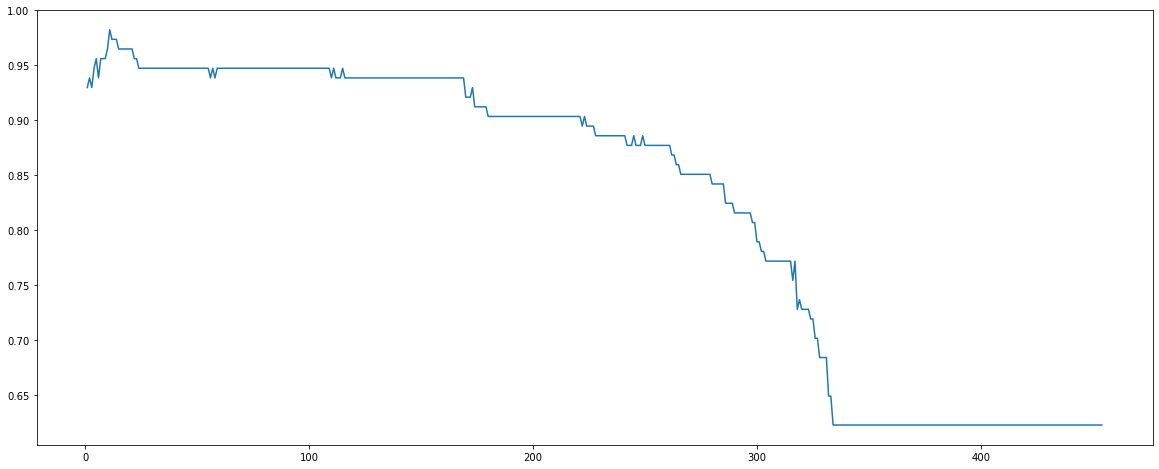

In [20]:
plt.figure(figsize = (20,8))

sns.lineplot(x = range(1,X_train.shape[0]),
             y = accuracy_scores)

plt.show() 

# Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [21]:
round(X_train.shape[0] * 0.75)

341

In [22]:
X_train.shape[0]

455

In [23]:
from sklearn.model_selection import cross_validate

score_list = [] 

max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

for i in range(1,round(X.shape[0] * 0.75)):
    score = cross_validate(estimator = KNeighborsClassifier(n_neighbors = i),
                           X = X,
                           y = y,
                           cv = None, #Default is 5-fold CV
                           scoring = ('accuracy')
                          )
    print(score['test_score'])
    score_list.append(np.array(score['test_score']).mean())



[0.85964912 0.92982456 0.9122807  0.9122807  0.91150442]
[0.87719298 0.92105263 0.92982456 0.92982456 0.88495575]
[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]
[0.87719298 0.92105263 0.93859649 0.94736842 0.92920354]
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
[0.86842105 0.92982456 0.94736842 0.93859649 0.92035398]
[0.87719298 0.93859649 0.94736842 0.94736842 0.92035398]
[0.86842105 0.93859649 0.93859649 0.95614035 0.92920354]
[0.87719298 0.93859649 0.94736842 0.95614035 0.9380531 ]
[0.86842105 0.93859649 0.94736842 0.94736842 0.92920354]
[0.87719298 0.93859649 0.94736842 0.95614035 0.92920354]
[0.86842105 0.93859649 0.94736842 0.96491228 0.9380531 ]
[0.87719298 0.93859649 0.94736842 0.95614035 0.94690265]
[0.86842105 0.93859649 0.94736842 0.96491228 0.95575221]
[0.86842105 0.93859649 0.93859649 0.95614035 0.94690265]
[0.86842105 0.93859649 0.92982456 0.95614035 0.95575221]
[0.86842105 0.93859649 0.92982456 0.95614035 0.95575221]
[0.86842105 0.93859649 0.938596

[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.92035398]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.894736

[0.76315789 0.79824561 0.80701754 0.85964912 0.87610619]
[0.76315789 0.79824561 0.79824561 0.85964912 0.86725664]
[0.76315789 0.79824561 0.79824561 0.85964912 0.86725664]
[0.75438596 0.78947368 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78947368 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78070175 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78070175 0.79824561 0.85964912 0.85840708]
[0.75438596 0.77192982 0.79824561 0.85964912 0.85840708]
[0.75438596 0.77192982 0.79824561 0.85964912 0.85840708]
[0.74561404 0.77192982 0.79824561 0.85964912 0.84955752]
[0.74561404 0.77192982 0.79824561 0.85964912 0.84955752]
[0.73684211 0.77192982 0.79824561 0.85087719 0.84955752]
[0.73684211 0.77192982 0.79824561 0.85087719 0.84955752]
[0.73684211 0.77192982 0.78947368 0.84210526 0.84070796]
[0.73684211 0.77192982 0.78947368 0.84210526 0.84070796]
[0.73684211 0.77192982 0.78947368 0.83333333 0.81415929]
[0.73684211 0.77192982 0.78947368 0.83333333 0.83185841]
[0.72807018 0.77192982 0.789473

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
score_list = [] 

max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

for i in range(1,round(X.shape[0] * 0.75)):
    score = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = i),
                           X = X,
                           y = y,
                           cv = 5, #Default is 5-fold CV     
                          )
    print(score)
    score_list.append(np.array(score).mean())



[0.85964912 0.92982456 0.9122807  0.9122807  0.91150442]
[0.87719298 0.92105263 0.92982456 0.92982456 0.88495575]
[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]
[0.87719298 0.92105263 0.93859649 0.94736842 0.92920354]
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
[0.86842105 0.92982456 0.94736842 0.93859649 0.92035398]
[0.87719298 0.93859649 0.94736842 0.94736842 0.92035398]
[0.86842105 0.93859649 0.93859649 0.95614035 0.92920354]
[0.87719298 0.93859649 0.94736842 0.95614035 0.9380531 ]
[0.86842105 0.93859649 0.94736842 0.94736842 0.92920354]
[0.87719298 0.93859649 0.94736842 0.95614035 0.92920354]
[0.86842105 0.93859649 0.94736842 0.96491228 0.9380531 ]
[0.87719298 0.93859649 0.94736842 0.95614035 0.94690265]
[0.86842105 0.93859649 0.94736842 0.96491228 0.95575221]
[0.86842105 0.93859649 0.93859649 0.95614035 0.94690265]
[0.86842105 0.93859649 0.92982456 0.95614035 0.95575221]
[0.86842105 0.93859649 0.92982456 0.95614035 0.95575221]
[0.86842105 0.93859649 0.938596

[0.83333333 0.86842105 0.90350877 0.93859649 0.92035398]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.92035398]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.89473684 0.93859649 0.91150442]
[0.83333333 0.86842105 0.894736

[0.76315789 0.79824561 0.80701754 0.85964912 0.87610619]
[0.76315789 0.79824561 0.80701754 0.85964912 0.87610619]
[0.76315789 0.79824561 0.80701754 0.85964912 0.87610619]
[0.76315789 0.79824561 0.79824561 0.85964912 0.86725664]
[0.76315789 0.79824561 0.79824561 0.85964912 0.86725664]
[0.75438596 0.78947368 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78947368 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78070175 0.79824561 0.85964912 0.85840708]
[0.75438596 0.78070175 0.79824561 0.85964912 0.85840708]
[0.75438596 0.77192982 0.79824561 0.85964912 0.85840708]
[0.75438596 0.77192982 0.79824561 0.85964912 0.85840708]
[0.74561404 0.77192982 0.79824561 0.85964912 0.84955752]
[0.74561404 0.77192982 0.79824561 0.85964912 0.84955752]
[0.73684211 0.77192982 0.79824561 0.85087719 0.84955752]
[0.73684211 0.77192982 0.79824561 0.85087719 0.84955752]
[0.73684211 0.77192982 0.78947368 0.84210526 0.84070796]
[0.73684211 0.77192982 0.78947368 0.84210526 0.84070796]
[0.73684211 0.77192982 0.789473

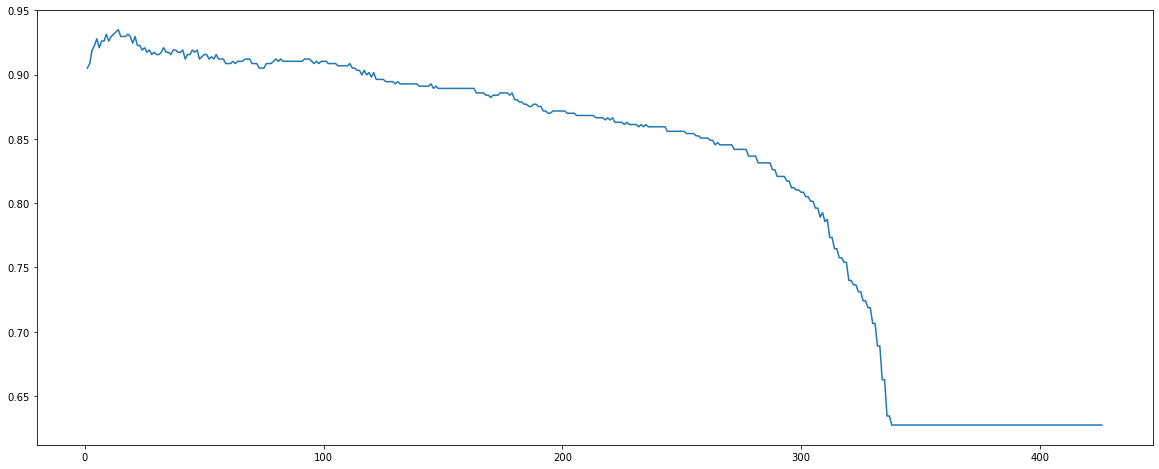

In [25]:
plt.figure(figsize = (20,8))

sns.lineplot(x = range(1,len(score_list)+1),
             y = score_list)

plt.show() 

<AxesSubplot:>

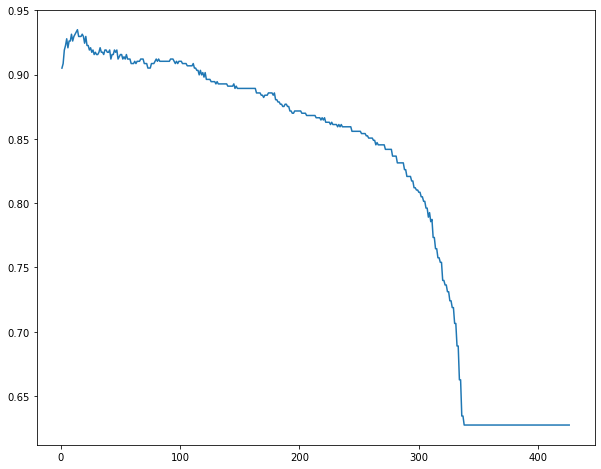

In [26]:
plt.figure(figsize = (10,8))

sns.lineplot(x = range(1,len(score_list) +1),
             y = score_list)

# Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [27]:
# Standarize X
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, columns = X.columns)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.75, random_state=42)

from sklearn.model_selection import cross_validate

score_list = [] 

for i in range(1,round(X_train.shape[0] * 0.75)):
    score = cross_validate(estimator = KNeighborsClassifier(n_neighbors = i),
                           X = X_train,
                           y = y_train,
                           cv = None, #Default is 5-fold CV
                           scoring = ('accuracy')
                          )
    score_list.append(np.array(score['test_score']).mean())



<AxesSubplot:>

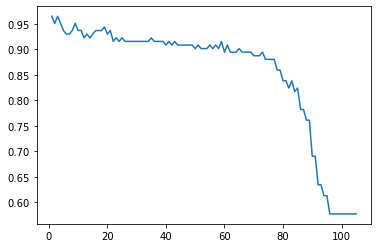

In [29]:
sns.lineplot(x = range(1,len(score_list) +1),
             y = score_list)

In [30]:
#Seems like it performs much much better. Why?

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

© 2019 Institute of Data